Lets Import all the functions which will mostly be used.

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
data = read_csv('iris.csv',index_col='Id')
list(data.columns)

['Sepal Length (cm)',
 'Sepal Width (cm)',
 'Petal Length (cm)',
 'Petal Width (cm)',
 'Species']

In [13]:
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data.shape

(150, 5)

In [15]:
data.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
import pandas as pd
pd.Series(data['Species']).value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

The above cell shows that each of the 3 species are equally distributed 
throughout the dataset

Now, time for exploratory data analysis(EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A6C2850>,
      dtype=object)

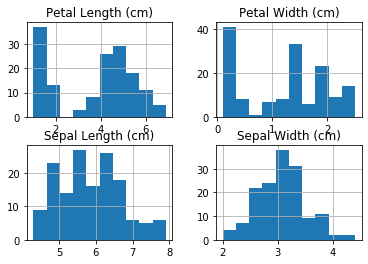

In [21]:
data.hist()

We observe that Sepal Width(cm) & Sepal Length(cm) are somewhat gaussian in nature.

Sepal Length (cm)       AxesSubplot(0.125,0.536818;0.352273x0.343182)
Sepal Width (cm)     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Petal Length (cm)          AxesSubplot(0.125,0.125;0.352273x0.343182)
Petal Width (cm)        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

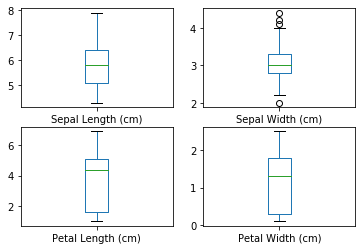

In [26]:
data.plot(kind='box',subplots=True,layout=(2,2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E8B0390>,
      dtype=object)

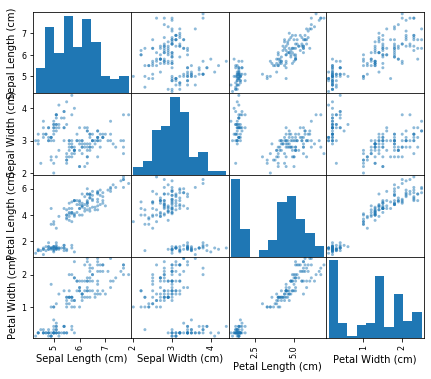

In [30]:
scatter_matrix(data,figsize=(7,6))

Taking a look at the correlation between Petal Length (cm) & Petal Width (cm)

This shows that perhaps Petal Length (cm) & Petal Width (cm) are positively correlated.

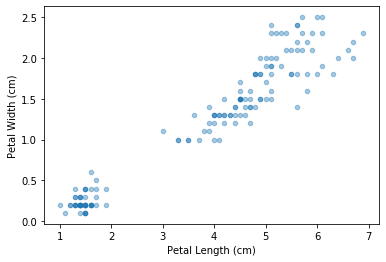

In [44]:
data.plot(kind='scatter',x='Petal Length (cm)',y='Petal Width (cm)',alpha=0.4)

Lets Create a  Cross-validation set for harnessing accuracy

In [58]:
X = data.iloc[:,0:4]
y = data.iloc[:,4]
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=26)

We will use 'accuracy' metric for cross_val_score() since
in this situation, we only care about maximising the true positives

In [59]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('SVM' , SVC()))
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits = 10, random_state=42)
    restemp = cross_val_score(model
            ,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(restemp)
    names.append(name)
    print(name, '  ',restemp.mean(), restemp.std())

LR    0.9416666666666667 0.08374896350934075
LDA    0.95 0.07637626158259735
KNN    0.9583333333333333 0.041666666666666685
CART    0.9499999999999998 0.055277079839256664
SVM    0.9666666666666666 0.04082482904638632


This shows that Support Vector Machine Classifier has the 
highest accuracy score

Lets visually explore the results of the 5 algorithms.

<BarContainer object of 5 artists>

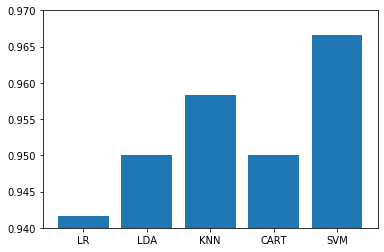

In [83]:
axes = plt.gca()
axes.set_ylim(0.94,0.97)
fm = []
for i in range (0,len(results)):
    fm.append(np.array(results[i]).mean())
plt.bar(x=names , height=fm)

This Plot shows that Support Vector Machines indeed 
gives the best accuracy.

So, we will use the Support Vector Machine for predictions

In [87]:
model = SVC()
model.fit(X_train , y_train)
pred = model.predict(X_val)
print('Accuracy Score:',accuracy_score(y_val,pred)*100,'%')
print('Classification Report:\n',
      classification_report(y_val,pred))
print('Confusion Matrix:\n',confusion_matrix(y_val,pred))

Accuracy Score: 96.66666666666667 %
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]


This shows that the Support Vector Machine algorithm gave 96.67% accuracy.
The confusion matrix shows that it predicted all 10 Iris-setosa's , 8 Iris-versicolor's & 11 Iris-virginica's correctly.
It missclassified 1 Iris-virginca as Iris-versicolor.
